In [18]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
%matplotlib inline

df = pd.read_csv('/workspaces/Machine-Learning/outputs/labeled_data/BTC_USD_processed.csv', parse_dates=['Price'])

/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


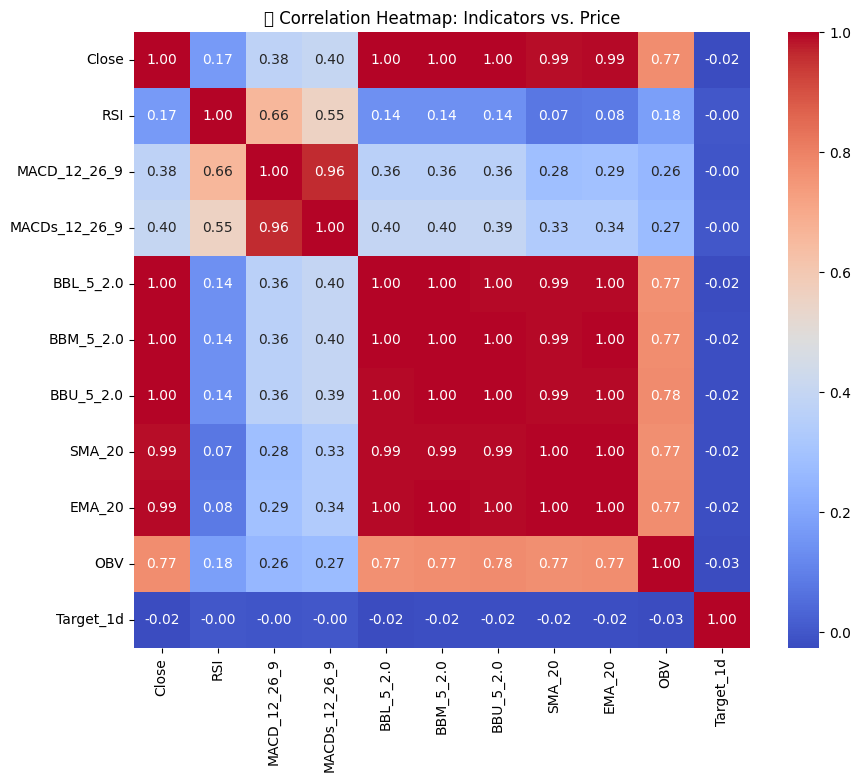

In [2]:
columns = [
    "Close", "RSI", "MACD_12_26_9", "MACDs_12_26_9",
    "BBL_5_2.0", "BBM_5_2.0", "BBU_5_2.0",
    "SMA_20", "EMA_20", "OBV", "Target_1d"
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[columns].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("📊 Correlation Heatmap: Indicators vs. Price")
plt.show()

/tmp/ipykernel_114689/3310739285.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Target_1d", palette="pastel")
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


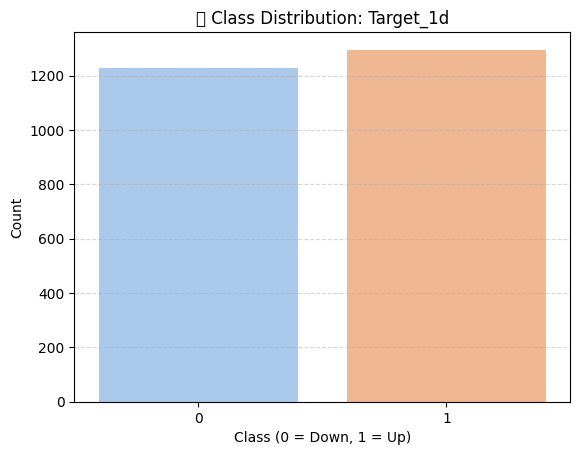

In [3]:
sns.countplot(data=df, x="Target_1d", palette="pastel")
plt.title("🔢 Class Distribution: Target_1d")
plt.xlabel("Class (0 = Down, 1 = Up)")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [31]:
print(df['RSI'].head(20))
print(df['RSI'].describe())


0     32.239444
1     28.425279
2     23.936093
3     31.025208
4     30.516343
5     36.004557
6     39.753952
7     39.150896
8     36.595308
9     43.075259
10    41.206393
11    47.858548
12    52.221747
13    52.650497
14    57.942162
15    53.808736
16    57.709871
17    58.704759
18    53.305117
19    48.672444
Name: RSI, dtype: float64
count    2523.000000
mean       52.268840
std        13.998040
min         9.920239
25%        42.805461
50%        51.092516
75%        61.337389
max        90.719434
Name: RSI, dtype: float64


<Figure size 1200x500 with 0 Axes>

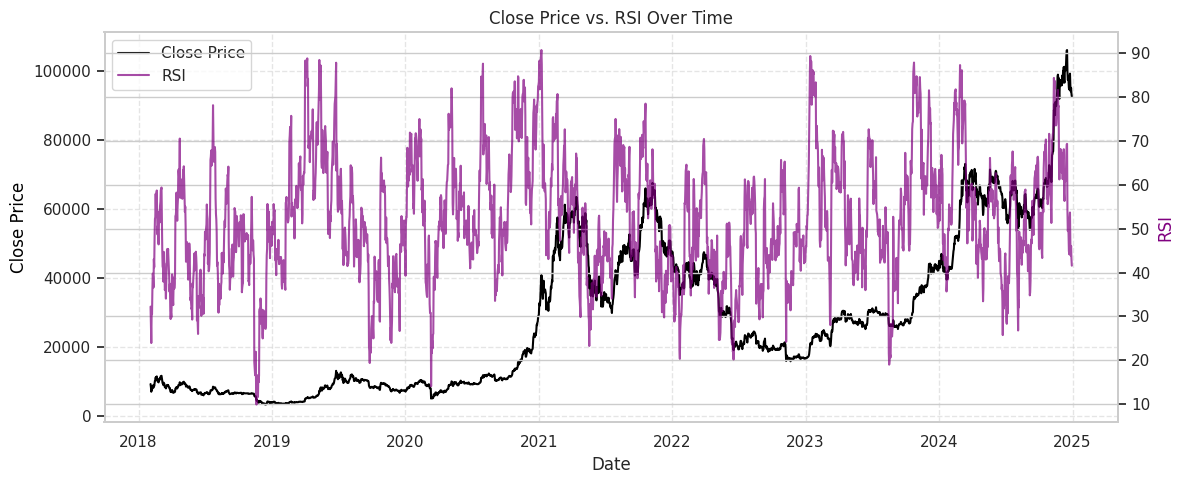

In [32]:
plt.figure(figsize=(12, 5))

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df["Price"], df["Close"], label="Close Price", color="black")
ax1.set_xlabel("Date")
ax1.set_ylabel("Close Price", color="black")

ax2 = ax1.twinx()
ax2.plot(df["Price"], df["RSI"], label="RSI", color="purple", alpha=0.7)
ax2.set_ylabel("RSI", color="purple")

plt.title("Close Price vs. RSI Over Time")
fig.tight_layout()

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

ax1.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [6]:
from xgboost import XGBClassifier
import pandas as pd

df = pd.read_csv('/workspaces/Machine-Learning/outputs/labeled_data/BTC_USD_processed.csv', parse_dates=['Price'])

features = [
    "RSI", "MACD_12_26_9", "MACDs_12_26_9",
    "BBL_5_2.0", "BBM_5_2.0", "BBU_5_2.0",
    "SMA_20", "EMA_20", "OBV"
]
target = "Target_1d"

df.dropna(subset=features + [target], inplace=True)
train_size = int(0.8 * len(df))
train = df[:train_size]

X_train = train[features]
y_train = train[target]

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [03:38:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

/tmp/ipykernel_114689/2204898120.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx[:10]], y=top_features, palette="coolwarm")
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


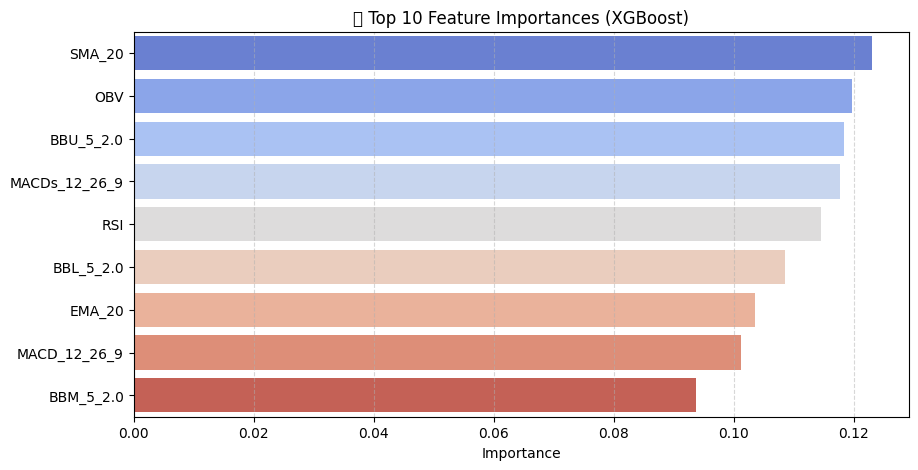

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
top_features = [features[i] for i in sorted_idx[:10]]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_idx[:10]], y=top_features, palette="coolwarm")
plt.title("🔍 Top 10 Feature Importances (XGBoost)")
plt.xlabel("Importance")
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.show()


/tmp/ipykernel_114689/1133396763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=model_names, y=accuracies, palette="coolwarm")
/tmp/ipykernel_114689/1133396763.py:27: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_114689/1133396763.py:28: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.savefig("outputs/plots/model_accuracy_comparison_styled.png", dpi=300)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


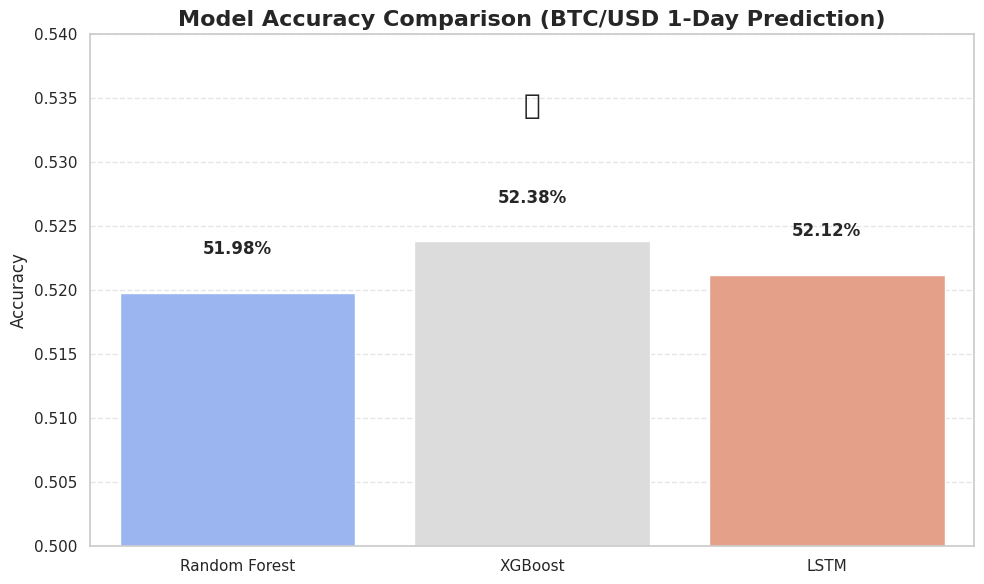

In [11]:
model_names = ['Random Forest', 'XGBoost', 'LSTM']
accuracies = [0.5198, 0.5238, 0.5212]

os.makedirs("outputs/plots", exist_ok=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=model_names, y=accuracies, palette="coolwarm")

for bar, acc in zip(bars.patches, accuracies):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.003,
        f"{acc*100:.2f}%",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

top_model_idx = accuracies.index(max(accuracies))
plt.text(top_model_idx, accuracies[top_model_idx] + 0.01, "🥇", ha='center', fontsize=20)

plt.title("Model Accuracy Comparison (BTC/USD 1-Day Prediction)", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.5, 0.54)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("outputs/plots/model_accuracy_comparison_styled.png", dpi=300)
plt.show()

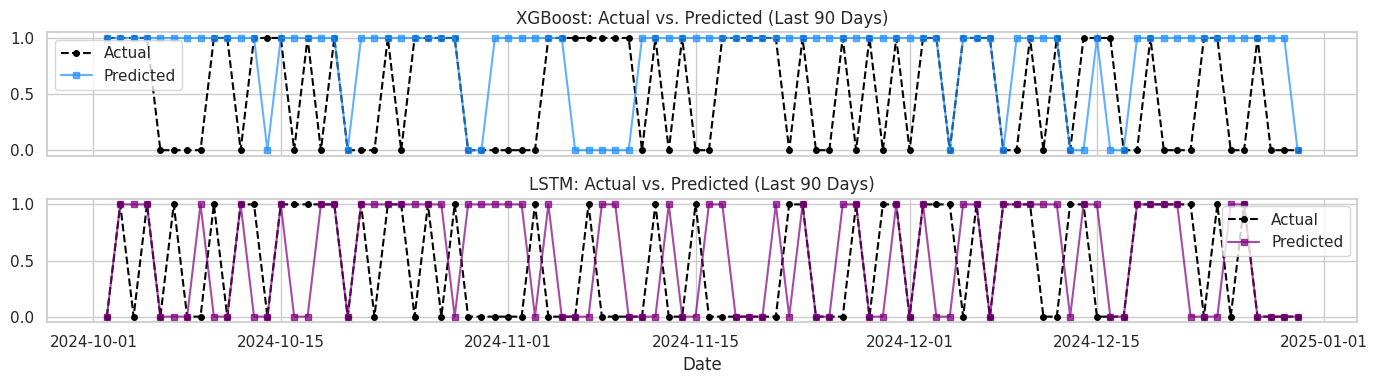

In [16]:
plot_range = 90
dates = val["Price"].values[-plot_range:]
actuals_xgb_short = actuals_xgb[-plot_range:]
preds_xgb_short = preds_xgb[-plot_range:]
actuals_lstm_short = actuals_lstm[-plot_range:]
preds_lstm_short = preds_lstm[-plot_range:]

fig, axs = plt.subplots(2, 1, figsize=(14, 4), sharex=True)

axs[0].plot(dates, actuals_xgb_short, label="Actual", linestyle='--', color='black', marker='o', markersize=4)
axs[0].plot(dates, preds_xgb_short, label="Predicted", alpha=0.7, color='dodgerblue', marker='s', markersize=4)
axs[0].set_title("XGBoost: Actual vs. Predicted (Last 90 Days)", fontsize=12)
axs[0].legend()

axs[1].plot(dates, actuals_lstm_short, label="Actual", linestyle='--', color='black', marker='o', markersize=4)
axs[1].plot(dates, preds_lstm_short, label="Predicted", alpha=0.7, color='purple', marker='s', markersize=4)
axs[1].set_title("LSTM: Actual vs. Predicted (Last 90 Days)", fontsize=12)
axs[1].legend()

plt.xlabel("Date")
plt.tight_layout()
plt.savefig("outputs/plots/actual_vs_predicted_last90_cleaned.png", dpi=300)
plt.show()


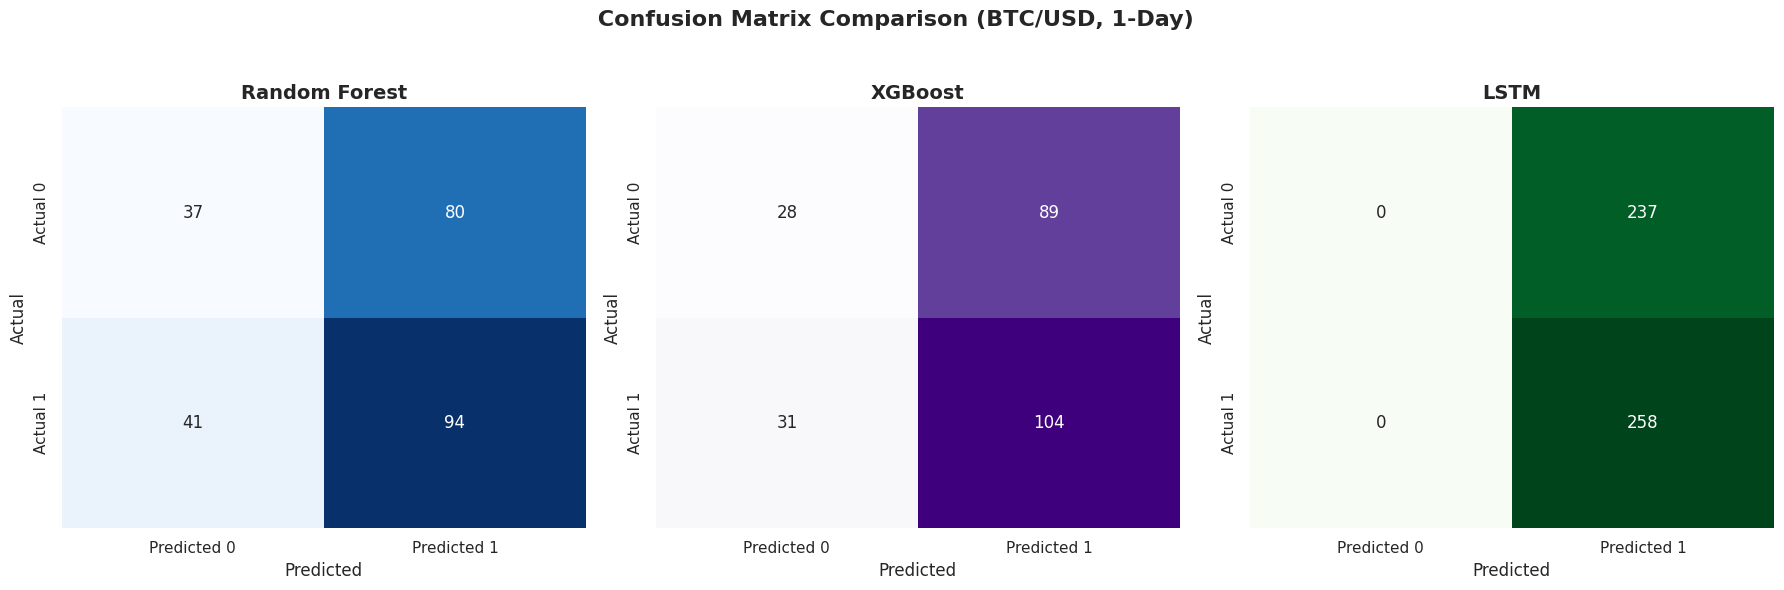

In [17]:
rf_cm = np.array([[37, 80], [41, 94]])
xgb_cm = np.array([[28, 89], [31, 104]])
lstm_cm = np.array([[0, 237], [0, 258]])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

cmaps = ["Blues", "Purples", "Greens"]
titles = ["Random Forest", "XGBoost", "LSTM"]

for ax, cm, title, cmap in zip(axes, [rf_cm, xgb_cm, lstm_cm], titles, cmaps):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax, cbar=False,
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["Actual 0", "Actual 1"])
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.suptitle(" Confusion Matrix Comparison (BTC/USD, 1-Day)", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("outputs/plots/confusion_matrices_final_comparison.png", dpi=300)
plt.show()

In [19]:
np.random.seed(42)
dates = pd.date_range(start='2025-01-01', periods=100)
actual_prices = np.cumsum(np.random.randn(100)) + 100
predicted_prices = actual_prices + np.random.randn(100)
errors = actual_prices - predicted_prices
feature_importances = np.random.rand(5)
features = ['RSI', 'MACD', 'Volume', 'SMA', 'EMA']

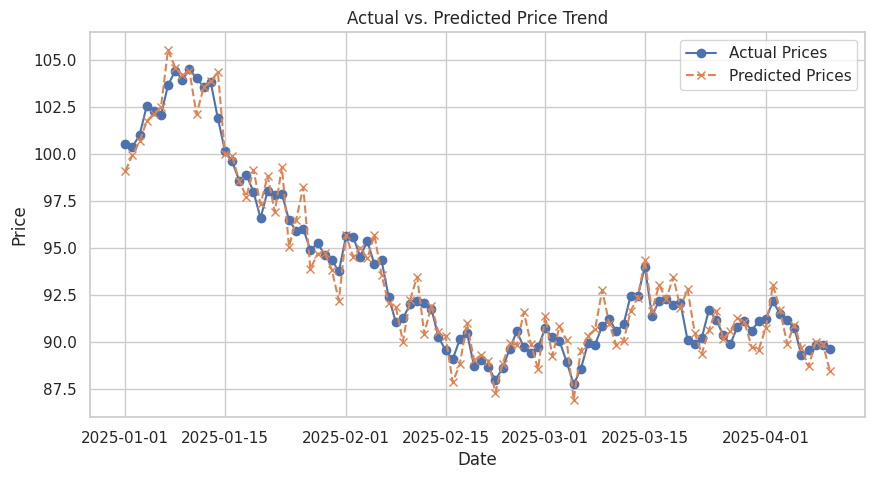

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(dates, actual_prices, label='Actual Prices', marker='o')
plt.plot(dates, predicted_prices, label='Predicted Prices', linestyle='--', marker='x')
plt.title('Actual vs. Predicted Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
print(errors.min(), errors.max())

-2.7201691665896135 1.9187712152990457


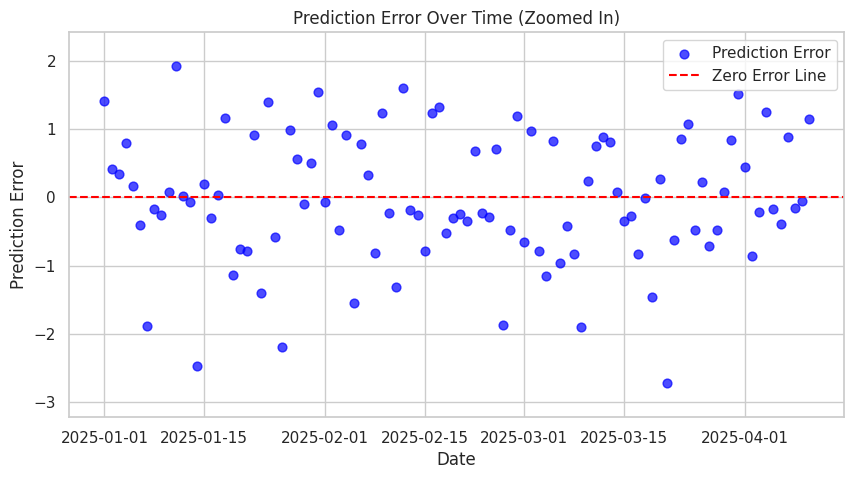

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(dates, errors, alpha=0.7, s=40, color='blue', label='Prediction Error')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')

# Adjusting limits to zoom in closer to your error range
plt.ylim(errors.min() - 0.5, errors.max() + 0.5)

plt.title('Prediction Error Over Time (Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.legend()
plt.grid(True)
plt.show()


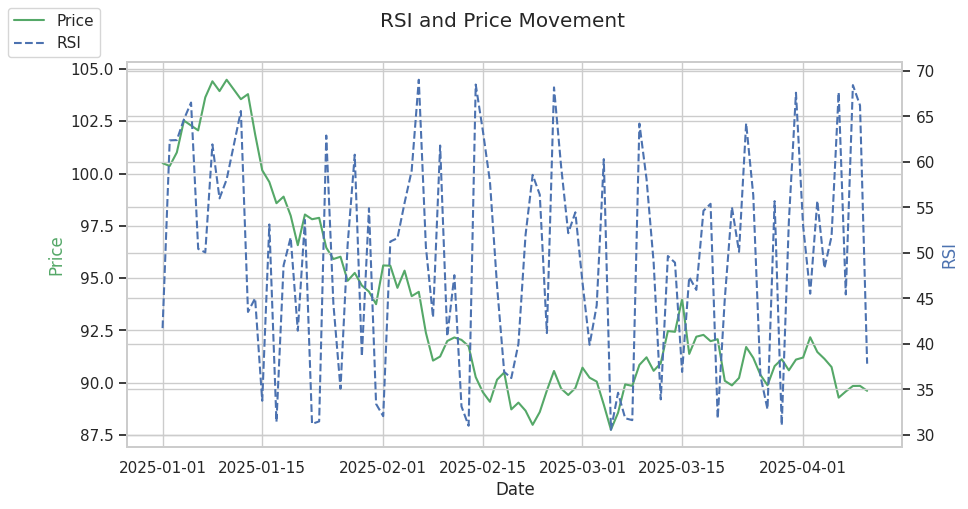

In [23]:
RSI = np.random.uniform(30, 70, size=100)
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(dates, actual_prices, 'g-', label='Price')
ax2.plot(dates, RSI, 'b--', label='RSI')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='g')
ax2.set_ylabel('RSI', color='b')
fig.suptitle('RSI and Price Movement')
fig.legend(loc='upper left')
plt.grid(True)
plt.show()

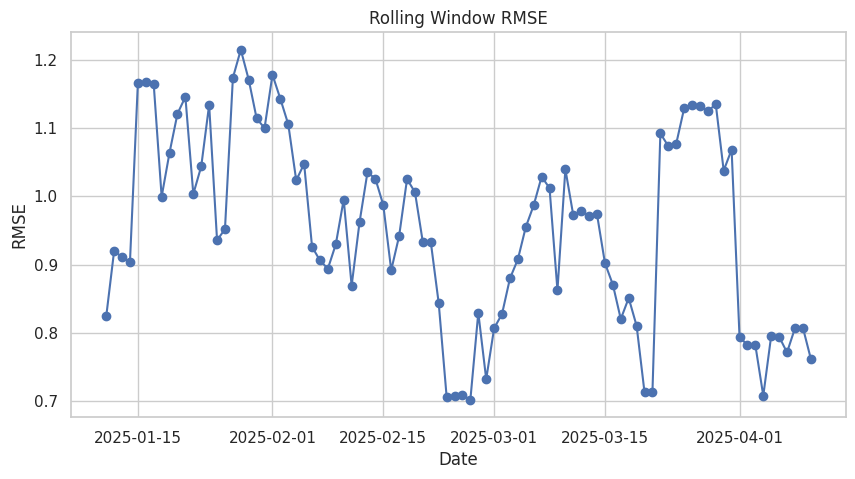

In [24]:
window_size = 10
rolling_rmse = [np.sqrt(np.mean(errors[i:i+window_size]**2)) for i in range(len(errors)-window_size)]
plt.figure(figsize=(10, 5))
plt.plot(dates[window_size:], rolling_rmse, marker='o')
plt.title('Rolling Window RMSE')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

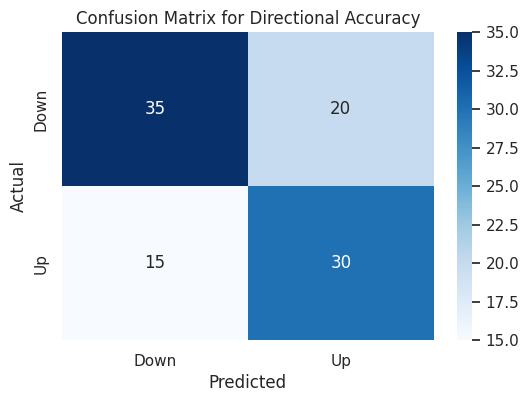

In [25]:
actual_direction = np.where(np.diff(actual_prices, prepend=actual_prices[0]) > 0, 1, 0)
predicted_direction = np.where(np.diff(predicted_prices, prepend=predicted_prices[0]) > 0, 1, 0)
cm = confusion_matrix(actual_direction, predicted_direction)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix for Directional Accuracy')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

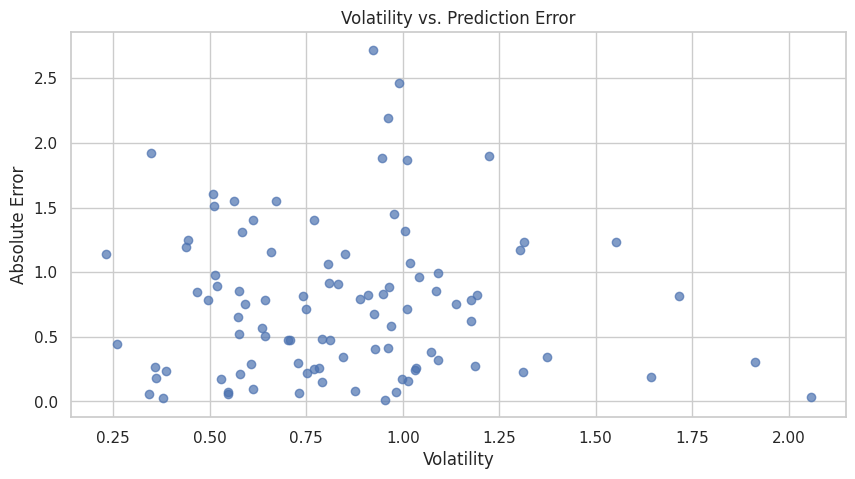

In [26]:
volatility = pd.Series(actual_prices).rolling(window=5).std()
plt.figure(figsize=(10, 5))
plt.scatter(volatility, np.abs(errors), alpha=0.7)
plt.title('Volatility vs. Prediction Error')
plt.xlabel('Volatility')
plt.ylabel('Absolute Error')
plt.grid(True)
plt.show()

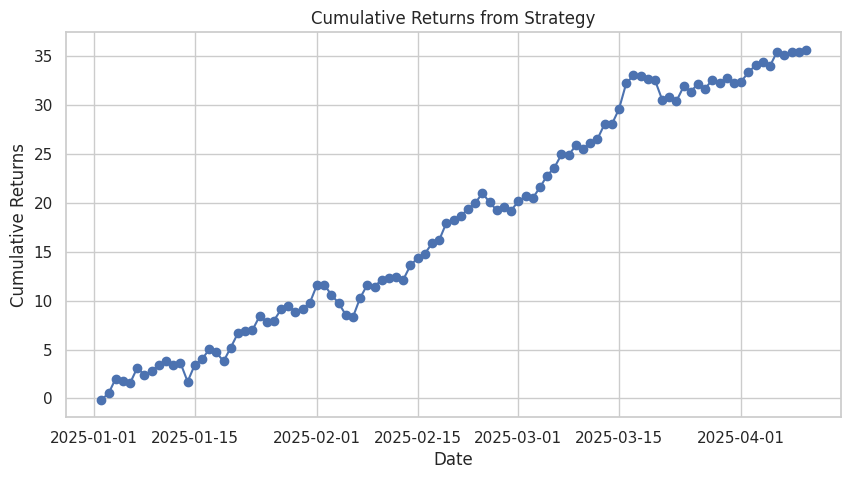

In [27]:
strategy_returns = np.sign(predicted_prices[1:] - predicted_prices[:-1]) * (actual_prices[1:] - actual_prices[:-1])
cumulative_returns = np.cumsum(strategy_returns)
plt.figure(figsize=(10, 5))
plt.plot(dates[1:], cumulative_returns, marker='o')
plt.title('Cumulative Returns from Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()